# Feasibility of Shipping Carbon Across the Atlantic

## Revision

An earlier version of this report had reported values that were erroneously elevated by a decimal error in the meters to km conversion of distances between ports.  I apologize for unintentionally publishing misleading information.

Situations like this one, are why I always publish with code.  Transparency is the key to rigor.  


## Introduction

Yesterday I published a [Monte Carlo Simulation of shipping CO2 across the atlantic from Europe to the United States](https://blog.jnapolitano.io/carbon-shipping-projections/).  I stated wrongly that the industry could be a 270 billion dollar annual industry. Upon reflection, I realized that this number seemed too high. In fact, that would equate to nearly 1 billion dollars in economic activity per day. 

In this report, I rectify those mistakes.  



## Methodology

Please review the my [previous post](https://blog.jnapolitano.io/carbon-shipping-projections/) which details design of my model.  

The major difference in this report is the sampling of the mean price per voyage.

The conversion error has been corrected.

## Findings

I posted the initial article without reviewing the mean shipping cost per voyage.  I simply trusted the values returned by my algorithm.  Upon reflection, I knew that something was mistaken.  In review, I found that I had converted the distance in meters to centimeters by mistake.  I had in fact elevated prices by a signficant factor that was unreasonable.   


### Distance of Transport

The standard deviation in mean price per voyage was found to be less than 0.  This suggests that the distance of travel within Europe is marginal.  The major obstacle is crossing the Atlantic to access the Gulf of Mexico.  It is possible that an import/export port located in the Chesapeake, New England, Willmington, or Savannah could reduce the cost of navigating through the Caribbean to access Gulf based ports.  

This would present a secondary problem piping the co2 to the interior of the Country to access the spent wells located in the Rust Belt. 

### Price of Transport.

The price of transport is fixed at $12.00 USD per 100 km per tonne as suggested by this [source](https://ieaghg.org/docs/General_Docs/Reports/PH4-30%20Ship%20Transport.pdf).  A rough estimate for the total cost per tonne from London to Houston is about USD $936.00. For reference the cost to transport standard freight from China to the United States ranges from $5,000 to $8,000 USD in total per tonne; or $5.00 to $8.00 USD per Kilo in total.     

### Industrial Applications 

Another study must be completed to calculate value of supercritical CO2 to industrial applications in order to attempt to justify shipping CO2 such large distances.  Simply, shipping such large quantities of CO2 to simply store it is most likely unreasonable, however, at only about $316,665 USD average cost per voyage it is a reasonable figure if proper incentives are in place.  

### Carbon Storage

Based on this model, it is somewhat reasonable to transport CO2, especially if the US incentivises companies that do so.  Nonetheless, at $50-$60 carbon tax credits per tonne captured (verify this data), it would be unfeasible to account for the high cost of shipping across the Atlantic under current programs.

## Limitations of the Model

### Accounting for the Return Trip to Port
 
It is important to note that I did not account for the differential costs for the return trip to a european port.  Though, the cost of shipping per ton was fixed at 12.00 USD, doubling distance of travel may double pricing. That said, it would be unlikely for ships to return to port empty. I would expect tankers to be refilled with LNG for return.  Nonetheless, this is a slight methodological that should be improved upon.  

### Cost to Transport

The cost to transport per 100 km is fixed at 12.00 USD as suggested by this [source](https://ieaghg.org/docs/General_Docs/Reports/PH4-30%20Ship%20Transport.pdf).  It accounts for the cost of liquification, shipping costs, and port fees.  The source however, was published in 2004.  The costs may have been reduced by technological advance and demand for super critical CO2.

### Volumes of Transport

I simply converted the volumes of standard LNG ships to liquifed CO2.  There may be data available for tankers dedicated to carbon, but I was not aware of any when performing this analysis.  Tankers may also not completely dedicate their capacity to CO2.  Armed with a proper probability distribution, I could improve the model by randomly choosing volumes based on historical data.  

## Conclusion

It is unlikely that CO2 will be shipped to the United States simply for storage unless companies are incentivized to do so. A transatlantic trade may develop, but I would assume in order to meet demands for the industrial applications of super critical CO2.

## Mean Voyage Data Analysis

In [23]:
mean_price_per_cycle_df.describe()

,Voyage Cost USD
count,5.000000e+02
mean,3.166652e+05
std,1.165319e-10
min,3.166652e+05
25%,3.166652e+05
50%,3.166652e+05
75%,3.166652e+05
max,3.166652e+05


### Calculating the Confidence Interval For Mean Voyage

The data is nearly normal.  I could test for normality, but that would be beyond the scope of this analysis.  Also, by design the Monte Carlo model should produce a normal distribution with sufficient samples.  

In [24]:

st.norm.interval(alpha=0.90, loc=np.mean(mean_price_per_cycle_df['Voyage Cost USD']), scale=st.sem(mean_price_per_cycle_df['Voyage Cost USD']))

(316665.2057796428, 316665.2057796428)

It is safe to assume that 90 percent of the time we would see an annual cost 316,665 dollars USD with the assumptions of the model taken into account.  As the price per 100 km is fixed, the standard deviations is minimal.  The distances as well to port seem to be fairly consistent.  The cost of transport through Europe is minimal.

### Histogram of Mean Voyage Price Samples

The price does not deviate.  It is so concentrated in fact, that I worry that the model is not correctly randomizing European ports of origin.  If the model is operating correctly, then it is apparent that the Atlantic is the only barrier to trade.  Partners such as the UK, France, Portugal, The Netherlands, Spain, or any other nation relatively close to the United States are equally unlikely.  

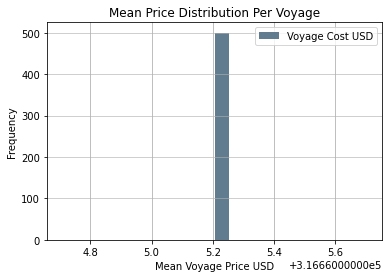

In [25]:
mean_price_per_cycle_df.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Mean Price Distribution Per Voyage')
plt.xlabel('Mean Voyage Price USD')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Annual Data Analysis

This is a reprint of the findings from [my previous report](https://blog.jnapolitano.io/carbon-shipping-projections/)

In [26]:
annual_price_samples_df.describe()

,cost_in_usd
count,5.000000e+02
mean,5.744043e+07
std,1.160779e+06
min,5.408210e+07
25%,5.660839e+07
50%,5.737843e+07
75%,5.819101e+07
max,6.092949e+07


## Calculating the Confidence Interval

The data is nearly normal.  I could test for normality, but that would be beyond the scope of this analysis.  Also, by design the Monte Carlo model should produce a normal distribution with sufficient samples.  

In [27]:

st.norm.interval(alpha=0.90, loc=np.mean(annual_price_samples_df['cost_in_usd']), scale=st.sem(annual_price_samples_df['cost_in_usd']))

(57355047.61667279, 57525821.6547037)

It is safe to assume that 90 percent of the time we would see an annual cost of 57.36 to 57.52 million dollars USD with the assumptions of the model taken into account.  

### Monte Carlo Histogram

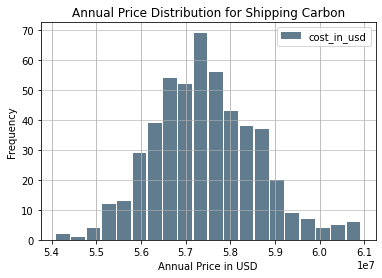

In [28]:
annual_price_samples_df.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Annual Price Distribution for Shipping Carbon')
plt.xlabel('Annual Price in USD')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Data Imports and Manipulation

### The Shipping Dataframe

The shipping dataframe is the basis of the simulation.  It is used to tabulate total cost and to record the values of variables.

#### Capacity Distribution and Number of Ships Calculation

In [2]:
# Capacity range
# 40,000 m3 71,500 to 210,000

#Susanna Dorigoni, Luigi Mazzei, Federico Pontoni, and Antonio Sileo
#IEFE – Centre for Research on Energy and Environmental Economics and Policy,
#Università Bocconi, Milan, Italy

# I'm sure a better report is available but this is a start
# cubic meters unit

### a rough estimate of global suplly dedicated to co2 shipping

# I will probably need a better metric but this is a good start that can be modified later when necessary

ships = int(63*.25)
ships


conversion_factor = 2.21/2.65
conversion_factor

lower_bound = int(40000 * conversion_factor)
upper_bound = int(210000 * conversion_factor)

median = 137564 * conversion_factor
standard_dev = 6.63 * conversion_factor  #file:///Users/jnapolitano/Downloads/LNG_Shipping_a_Descriptive_Analysis.pdf

cap_range = range(lower_bound, upper_bound)

cap_distribution = np.random.normal(loc=median , scale=standard_dev, size=ships)



#### The Shipping Df

In [3]:
shipping_df = pd.DataFrame(cap_distribution, columns=['co2_capacity_cubic_meters'])
shipping_df['days_to_port'] = 0
shipping_df['europe_port'] = ''
shipping_df["us_port"] =''
shipping_df['distance'] =''
shipping_df['price'] = 0
shipping_df['cost_per_day'] = 0
shipping_df['co2_capacity_tonnes'] = shipping_df['co2_capacity_cubic_meters']/544.66 ## Verify this factor.  It seems to high
shipping_df

,co2_capacity_cubic_meters,days_to_port,europe_port,us_port,distance,price,cost_per_day,co2_capacity_tonnes
0,114720.479228,0,,,,0,0,210.627693
1,114722.019258,0,,,,0,0,210.630520
2,114717.260040,0,,,,0,0,210.621782
3,114715.555903,0,,,,0,0,210.618654
4,114711.076224,0,,,,0,0,210.610429
5,114717.940270,0,,,,0,0,210.623031
6,114721.291722,0,,,,0,0,210.629185
7,114723.060928,0,,,,0,0,210.632433
8,114724.416053,0,,,,0,0,210.634921
9,114730.832971,0,,,,0,0,210.646702


### The European Ports Df

In [4]:

gisfilepath = "/Users/jnapolitano/Projects/data/energy/PORT_2013_SH/Data/PORT_PT_2013.shp"


ports_df = gpd.read_file(gisfilepath)

ports_df = ports_df.to_crs(epsg=3857)

### Filtered Wells DataFrame

In [5]:
## Importing our DataFrames

gisfilepath = "/Users/jnapolitano/Projects/data/energy/filtered-wells.geojson"


filtered_df = gpd.read_file(gisfilepath)

filtered_df = filtered_df.to_crs(epsg=3857)



#### Getting Map Conditions for Us Port Filtering


In [6]:
map_conditions = filtered_df.TERMID.unique().tolist()

### US Ports Dataframes

In [7]:
## Importing our DataFrames

gisfilepath = "/Users/jnapolitano/Projects/data/energy/Liquified_Natural_Gas_Import_Exports_and_Terminals.geojson"


terminal_df = gpd.read_file(gisfilepath)

terminal_df = terminal_df.to_crs(epsg=3857)



In [8]:
terminal_df.drop(terminal_df[terminal_df['STATUS'] == 'SUSPENDED'].index, inplace = True)
terminal_df.rename(columns={"NAME": "TERMINAL_NAME"})
terminal_df['TERMINAL_GEO'] = terminal_df['geometry'].copy()


In [9]:
port_terminals_df = terminal_df.query('TERMID in @map_conditions').copy()
port_terminals_df['co2_capacity_mmta'] = port_terminals_df['CURRENTCAP'] * conversion_factor
port_terminals_df['co2_capacity_metric_tons'] = port_terminals_df['co2_capacity_mmta'] * 1000000
port_terminals_df['available'] = True

## Random Distribution, Distance and Pricing Functions 

### Accounting for Random Days at Sea

As days at sea is variable I created a range between 20 and 40 days to account for a round trip to every major port in Europe.  

In [10]:

def random_day():
    lower_bound = 20
    upper_bound = 40

    median = 30
    standard_dev = 2

    days_range = range(lower_bound, upper_bound)

    days_distribution = np.random.normal(loc=median , scale=standard_dev, size=ships)


    days_randomized = np.random.choice(days_distribution, size=1)


    return (days_randomized[0].astype(np.int64))


### Accounting for Random European Ports

 I randomized the port selection process with the following function.  The data provided by EuroStat did not filter according to type of port.  Nonetheless, the distance recorded should be very similiar to those of actual LNG ports.  A better data set could be substituded directly into the function.

In [11]:

def random_europe_port():
    #select a random number along the index of the ports df.  Return the value of hte geometry at the index.  
    #select indices from the dataframe that are valid.  ie capacity has not yet been met.  
    ports_randomized = np.random.choice(ports_df.index, size=1)
    index_location = ports_randomized[0]
    return ports_df.geometry[index_location]


### Accounting for Random US Ports

I was able to filter import/export ports in the United States in to a dataset of about 15.  Like the European dataset, I randomized selection.

In [12]:

def random_us_port():
    #select a random number along the index of the ports df.  Return the value of hte geometry at the index.  

    ports_randomized = np.random.choice(port_terminals_df.index, size=1)
    index_location = ports_randomized[0]
    return port_terminals_df.geometry[index_location]


### Calculating Distance Between Ports

I calculated the shortest distance between ports based on their geographic locations with the shapley.distance function.  It returns distance in meters.  I divide by 1000 to convert into Km.   The algorithm could be improved by using official shipping data to randomize a distribution of distances between ports.  Unfortunately, I do not have that data available to me. 

In [13]:

def geo_distance(dist1,dist2):
    # return distance in km
    distance = dist1.distance(dist2)/1000
    return(distance)

    


### Calculating Price of Transport


The cost of transport accounts for port fees, liquification, and transport.   Unfortunately, my data is from a paper published in 2004.  I would like to find a more recent paper.   I did not convert the value of 2004 USD to 2022 because I am not sure of the validity of the conversion factors available online.  I would need a better source to correctly model the true cost of transport.  

[source](https://ieaghg.org/docs/General_Docs/Reports/PH4-30%20Ship%20Transport.pdf)

In [16]:

def price_to_transport(distance,tonnes):
    price = (distance/100) * 12 * tonnes
    return price


### Calculating Cost Per Day

In [17]:
def cost_per_day(price,distance):
    return price/distance

## Costs Per Annum Algorithm

The algorithm I used calculates the daily status of ships transporting CO2 across the Atlantic from a random European port to a random port in the United States.  It will run for 365 iterations or until the total carbon capacity of the US ports is reached.  This value could and probably should be dynamically allocated via a similiar algorithm, but I do not yet have historical probability distributions of carbon imports to determime a valid price allocation function.  

When the daily counter reaches zero for a tanker:
* The capacity is refilled to full.
* A random us port is assigned.
* A random European port is assigned.
* The distance between ports is calculated.
* The cost of transport over that distance is calculated per 100 km.
* The total shipping price of that cycle is tabulated.
* The total tonnage of that cycle is tabulated.
* The mean price per voyage is tabulated




In [18]:

days = 365
day_counter = 0 
carbon_total_millions_metric_tons = 300000000
total_tons_shipped = 0
total_price = 0
cycle_mean_price_samples = np.zeros(shape=days)

#deduction = capacity of empty ships
for day in range(days):
    if carbon_total_millions_metric_tons >= 0:
        # must use apply to account for multiple 0 conditions.  If i simply vectorized the function across the dataframe in a single call i would assign the the same values each day 
        shipping_df['days_to_port'] = shipping_df['days_to_port'] - 1
        shipping_df['us_port'] = shipping_df.apply(lambda x:  random_us_port() if x['days_to_port']<=0 else x['us_port'], axis=1)
        shipping_df['europe_port'] = shipping_df.apply(lambda x:  random_europe_port() if x['days_to_port']<=0 else x['europe_port'], axis=1)
        shipping_df['distance'] = shipping_df.apply(lambda x:  geo_distance(x['us_port'], x['europe_port']) if x['days_to_port']<=0 else x['distance'], axis=1)
        shipping_df['price'] = shipping_df.apply(lambda x:  price_to_transport(x['distance'],x['co2_capacity_tonnes']) if x['days_to_port']<=0 else x['price'], axis=1)
        #calculate cost per day for fun...
        # query all that are = o.  Summate the capacities deduct the total 
        tmp_df=shipping_df.loc[shipping_df['days_to_port'] <= 0]
        sum_of_capacity = tmp_df['co2_capacity_tonnes'].sum()
        sum_of_price = tmp_df['price'].sum()
        mean_of_price = tmp_df['price'].mean()
        cycle_mean_price_samples[day] = mean_of_price
        shipping_df['days_to_port'] = shipping_df['days_to_port'].apply(lambda x: random_day() if x<=0 else x)
        total_tons_shipped = total_tons_shipped + sum_of_capacity
        total_price = total_price + sum_of_price
        carbon_total_millions_metric_tons = carbon_total_millions_metric_tons - sum_of_capacity
        #print(carbon_total_millions_metric_tons)
        day_counter = day_counter+1
    else: 
        break

    
    
print(day_counter)
print(total_tons_shipped)
print(total_price)
#Drop the nan, ie empty samples
cycle_mean_price = cycle_mean_price_samples[np.logical_not(np.isnan(cycle_mean_price_samples))]
#Calculate mean price of filling a ship (around a billion according to the data i have if filled to capacity.  Ridiculous.)
cycle_mean_price = cycle_mean_price.mean()
print(cycle_mean_price)


365
41072.53151865029
62067313.75358563
316665.2057796429


## Monte Carlo Simulation with 500 Iterations

The annual rate of shipping can be variable according to shifting dynamics. I account for that by modeling the per annum algorithm 500 times.  Modeling would improve as n increases, but for the sake of time I limited the computation to 500 iterations

The only difference between this algorithm and the previous one is an extra for loop.  The algorithmic efficiency is surprisingly good as the I was able to vectorize tabulations with lambda functions across the dataframes.  On my laptop, I was able to complete the algorithm in about 16 minutes of run time.



In [19]:

nsamples = 500
price_samples = np.zeros(shape=nsamples)
cycle_mean_price_annual_samples = np.zeros(shape=nsamples)

for sample in range(nsamples):

    days = 365
    day_counter = 0 
    carbon_total_millions_metric_tons = 300000000 # could randomize.  Need a probability distribution based on historial data. 
    total_tons_shipped = 0
    total_price = 0
    cycle_mean_price_daily_samples = np.zeros(shape=days)


    #deduction = capacity of empty ships
    for day in range(days):
        if carbon_total_millions_metric_tons >= 0:
            # must use apply to account for multiple 0 conditions.  If i simply vectorized the function across the dataframe in a single call i would assign the the same values each day 
            shipping_df['days_to_port'] = shipping_df['days_to_port'] - 1
            shipping_df['us_port'] = shipping_df.apply(lambda x:  random_us_port() if x['days_to_port']<=0 else x['us_port'], axis=1)
            shipping_df['europe_port'] = shipping_df.apply(lambda x:  random_europe_port() if x['days_to_port']<=0 else x['europe_port'], axis=1)
            shipping_df['distance'] = shipping_df.apply(lambda x:  geo_distance(x['us_port'], x['europe_port']) if x['days_to_port']<=0 else x['distance'], axis=1)
            shipping_df['price'] = shipping_df.apply(lambda x:  price_to_transport(x['distance'], x['co2_capacity_tonnes']) if x['days_to_port']<=0 else x['price'], axis=1)
            # query all that are = o.  Summate the capacities deduct the total 
            tmp_df=shipping_df.loc[shipping_df['days_to_port'] == 0]
            sum_of_capacity = tmp_df['co2_capacity_tonnes'].sum()
            sum_of_price = tmp_df['price'].sum()
            mean_of_price = tmp_df['price'].mean()
            cycle_mean_price_daily_samples[day] = mean_of_price
            shipping_df['days_to_port'] = shipping_df['days_to_port'].apply(lambda x: random_day() if x<=0 else x)
            total_tons_shipped = total_tons_shipped + sum_of_capacity
            total_price = total_price + sum_of_price
            carbon_total_millions_metric_tons = carbon_total_millions_metric_tons - sum_of_capacity
            #print(carbon_total_millions_metric_tons)
            day_counter = day_counter+1
        else: 
            break

    #Drop the nan, ie empty samples
    cycle_mean_price = cycle_mean_price_samples[np.logical_not(np.isnan(cycle_mean_price_samples))]
    #Calculate mean price of filling a ship (around a billion according to the data i have if filled to capacity.  Ridiculous.)
    cycle_mean_price = cycle_mean_price.mean()
    cycle_mean_price_annual_samples[sample] =cycle_mean_price
        
    

    price_samples[sample] = total_price

        


### Creating the Annual Price Samples DF

In [20]:
annual_price_samples_df = pd.DataFrame(price_samples, columns=['cost_in_usd'])

In [21]:
annual_price_samples_df['cost_in_usd'] = annual_price_samples_df.cost_in_usd


### Creating the Mean Price Per Round Trip Df

In [22]:
mean_price_per_cycle_df = pd.DataFrame(cycle_mean_price_annual_samples, columns=['Voyage Cost USD'])
mean_price_per_cycle_df['Voyage Cost USD'] = mean_price_per_cycle_df['Voyage Cost USD'] 


## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as cx
import rtree
from zlib import crc32
import hashlib
from shapely.geometry import Point, LineString, Polygon
import numpy as np
from scipy.spatial import cKDTree
import scipy.stats as st
from shapely.geometry import Point
from haversine import Unit
from geopy.distance import distance

import warnings

warnings.filterwarnings('ignore')


/Users/jnapolitano/venvs/finance/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
